In [1]:
%reset 
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import mne

from scipy.io import loadmat

In [2]:
os.getcwd()

'/Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG'

In [3]:
subj_id = 19

In [4]:
subj_name = f'subj_{subj_id}'

eeg_path = "../../data/rochester/natural_speech/EEG/"
env_path = "../../data/rochester/natural_speech/Stimuli/Envelopes/"
write_path = "../../outputs/rochester_data/natural_speech/"
os.makedirs(write_path, exist_ok=True)

subj_dir = os.path.join(write_path, subj_name)
os.makedirs(subj_dir, exist_ok=True)   

print(f'List write path: {os.listdir(write_path)}')
print(f'List subject directory: {os.listdir(subj_dir)}')

List write path: ['subj_12', 'subj_15', 'subj_14', 'subj_13', '.DS_Store', 'subj_8', 'subj_6', 'subj_1', 'subj_7', 'subj_9', 'subj_18', 'subj_16', 'subj_11', 'subj_10', 'subj_17', 'subj_19', 'subj_2', 'subj_5', 'after_ica_raw', 'subj_4', 'subj_3']
List subject directory: []


In [5]:
print(os.listdir(env_path), len(os.listdir(env_path)))
print('-----------------')
print(os.listdir(eeg_path), len(os.listdir(eeg_path)))
print('-----------------')
print(os.listdir(eeg_path + f'Subject{subj_id}/'), len(os.listdir(eeg_path + f'Subject{subj_id}/')))

['audio17_128Hz.mat', 'audio9_128Hz.mat', 'audio4_128Hz.mat', 'audio11_128Hz.mat', 'audio2_128Hz.mat', 'audio16_128Hz.mat', 'audio8_128Hz.mat', 'audio5_128Hz.mat', 'audio10_128Hz.mat', 'audio3_128Hz.mat', 'audio20_128Hz.mat', 'audio15_128Hz.mat', 'audio6_128Hz.mat', 'audio18_128Hz.mat', 'audio13_128Hz.mat', 'audio14_128Hz.mat', 'audio7_128Hz.mat', 'audio19_128Hz.mat', 'audio12_128Hz.mat', 'audio1_128Hz.mat'] 20
-----------------
['Subject15', 'Subject2', 'Subject5', 'Subject12', 'Subject4', 'Subject13', 'Subject14', 'Subject3', 'Subject8', 'Subject18', 'Subject6', 'Subject11', 'Subject16', 'Subject1', 'Subject17', 'Subject7', 'Subject10', 'Subject19', 'Subject9', 'Readme.txt'] 20
-----------------
['Subject19_Run2.mat', 'Subject19_Run3.mat', 'Subject19_Run1.mat', 'Subject19_Run18.mat', 'Subject19_Run19.mat', 'Subject19_Run4.mat', 'Subject19_Run20.mat', 'Subject19_Run5.mat', 'Subject19_Run7.mat', 'Subject19_Run6.mat', 'Subject19_Run12.mat', 'Subject19_Run13.mat', 'Subject19_Run8.mat', '

### Start preprocessing

Run1 128 [179 178] fs:128    Run2 128 [182 181] fs:128    Run3 128 [181 180] fs:128    Run4 128 [182 181] fs:128    Run5 128 [181 180] fs:128    Run6 128 [203 202] fs:128    Run7 128 [167 166] fs:128    Run8 128 [172 171] fs:128    Run9 128 [177 176] fs:128    Run10 128 [194 193] fs:128    Run11 128 [177 176] fs:128    Run12 128 [181 180] fs:128    Run13 128 [184 183] fs:128    Run14 128 [179 178] fs:128    Run15 128 [184 183] fs:128    Run16 128 [187 186] fs:128    Run17 128 [188 187] fs:128    Run18 128 [182 181] fs:128    Run19 128 [178 177] fs:128    Run20 128 [190 189] fs:128    
-----------------
Durations of 20 runs
[0, 22729, 23130, 23050, 23213, 23082, 25873, 21213, 21899, 22521, 24699, 22473, 23011, 23451, 22839, 23469, 23822, 23998, 23189, 22711, 24200]
Event points
[0, 22729, 45859, 68909, 92122, 115204, 141077, 162290, 184189, 206710, 231409, 253882, 276893, 300344, 323183, 346652, 370474, 394472, 417661, 440372]
Event points in minutes
[ 0  2  5  8 11 15 18 21 23 26 30 33

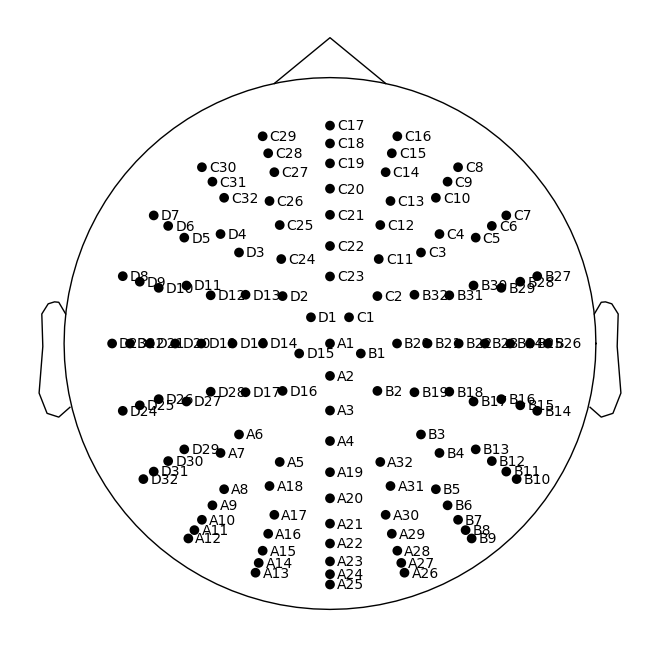

{'EEG0': 'A1', 'EEG1': 'A2', 'EEG2': 'A3', 'EEG3': 'A4', 'EEG4': 'A5', 'EEG5': 'A6', 'EEG6': 'A7', 'EEG7': 'A8', 'EEG8': 'A9', 'EEG9': 'A10', 'EEG10': 'A11', 'EEG11': 'A12', 'EEG12': 'A13', 'EEG13': 'A14', 'EEG14': 'A15', 'EEG15': 'A16', 'EEG16': 'A17', 'EEG17': 'A18', 'EEG18': 'A19', 'EEG19': 'A20', 'EEG20': 'A21', 'EEG21': 'A22', 'EEG22': 'A23', 'EEG23': 'A24', 'EEG24': 'A25', 'EEG25': 'A26', 'EEG26': 'A27', 'EEG27': 'A28', 'EEG28': 'A29', 'EEG29': 'A30', 'EEG30': 'A31', 'EEG31': 'A32', 'EEG32': 'B1', 'EEG33': 'B2', 'EEG34': 'B3', 'EEG35': 'B4', 'EEG36': 'B5', 'EEG37': 'B6', 'EEG38': 'B7', 'EEG39': 'B8', 'EEG40': 'B9', 'EEG41': 'B10', 'EEG42': 'B11', 'EEG43': 'B12', 'EEG44': 'B13', 'EEG45': 'B14', 'EEG46': 'B15', 'EEG47': 'B16', 'EEG48': 'B17', 'EEG49': 'B18', 'EEG50': 'B19', 'EEG51': 'B20', 'EEG52': 'B21', 'EEG53': 'B22', 'EEG54': 'B23', 'EEG55': 'B24', 'EEG56': 'B25', 'EEG57': 'B26', 'EEG58': 'B27', 'EEG59': 'B28', 'EEG60': 'B29', 'EEG61': 'B30', 'EEG62': 'B31', 'EEG63': 'B32', 'EE

<RawArray | 131 x 464572 (3629.5 s), ~464.5 MB, data loaded>

In [6]:
eegs, envs, mastoids = [], [], []
events = []

num_runs = 20
for run in range(1, num_runs + 1):


    eeg_file = os.path.join(eeg_path, f'Subject{subj_id}', f'Subject{subj_id}_Run{run}.mat')
    eeg, fs, mastoid = tuple(loadmat(eeg_file).get(k, None).T for k in ('eegData', 'fs', 'mastoids'))
    fs = fs.astype(int).item()

    env_file = os.path.join(env_path, f'audio{run}_128Hz.mat')
    env = loadmat(env_file)['env'].T

    print(f'Run{run} {eeg.shape[0]} [{eeg.shape[1]/fs:.0f} {env.shape[1]/fs:.0f}] fs:{fs}', end='    ')
    
    eeg /= 1e6
    env *= 1e2
    mastoid /= 1e6

    len_min = min(eeg.shape[1], env.shape[1])
    eegs.append(eeg[:, :len_min])
    envs.append(env[:, :len_min])
    mastoids.append(mastoid[:, :len_min])

# RUN information
run_durs = [0]
run_durs.extend([e.shape[1] for e in eegs])
print("")
print("-----------------")
print("Durations of 20 runs")
print(run_durs)
event_points = [sum(run_durs[:i]) for i in range(1, len(run_durs))]
print("Event points")
print(event_points)
print("Event points in minutes")
print(np.array(event_points)//(fs*60))

print("-----------------")
# create events from run_durs
events = [[p, 0, ix+1] for ix, p in enumerate(event_points)]
print(events)
event_desc={e[2]:f"Run{e[2]}" for  e in events}
annots = mne.annotations_from_events(np.array(events), sfreq=fs, event_desc=event_desc)
annots[0]['description'] = 'Run1/Good/Noisy'
print(annots[0])

# Concatenate all the runs
eegs = np.concatenate(eegs, axis=1)
envs = np.concatenate(envs, axis=1)
mastoids = np.concatenate(mastoids, axis=1)
print(eegs.shape, envs.shape, mastoids.shape)

# Create MNE info and raw object
ch_types = ['eeg'] * 128 + ['bio'] * 2 + ['stim']
ch_names = [f'EEG{i}' for i in range(128)] + ['M1', 'M2'] + ['stim']
info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=ch_types)
raw = mne.io.RawArray(np.concatenate((eegs, mastoids, envs), axis=0), info)
raw.add_events(events)
raw.set_annotations(annots)
print(raw)


print("-----------------")
# Set Montage
montage_name = "biosemi128"
montage = mne.channels.make_standard_montage(montage_name, head_size='auto')
print(montage)
print(montage.ch_names)
print(dir(montage))
%matplotlib inline
with mne.viz.use_browser_backend('matplotlib'):
    montage.plot();

biosemi_ch_names = montage.ch_names
mapping_ch_names = dict(zip(raw.ch_names[:128], biosemi_ch_names))
print(mapping_ch_names)
raw.rename_channels(mapping=mapping_ch_names)
raw.set_montage(montage)




### Check reference channels

Effective window size : 2.000 (s)
dict_keys(['_sfreq', '_inst_type', 'info', 'preload', '_method', '_dims', '_data_type', '_data', '_freqs'])


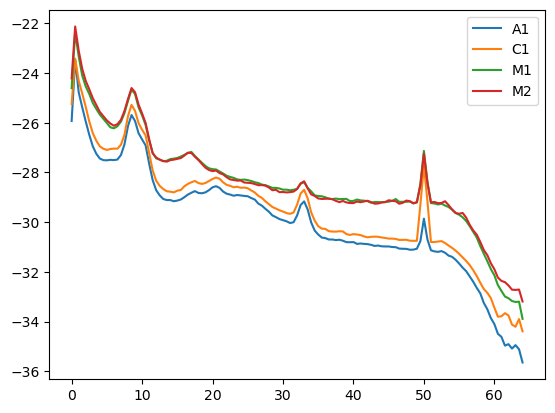

In [7]:
pow_mastoid = raw.copy().compute_psd(picks=['A1', 'C1', 'M1', 'M2'])
print(pow_mastoid.__dict__.keys())
%matplotlib inline
plt.plot(pow_mastoid._freqs, np.log(pow_mastoid._data.T))
plt.legend(['A1', 'C1', 'M1', 'M2'])


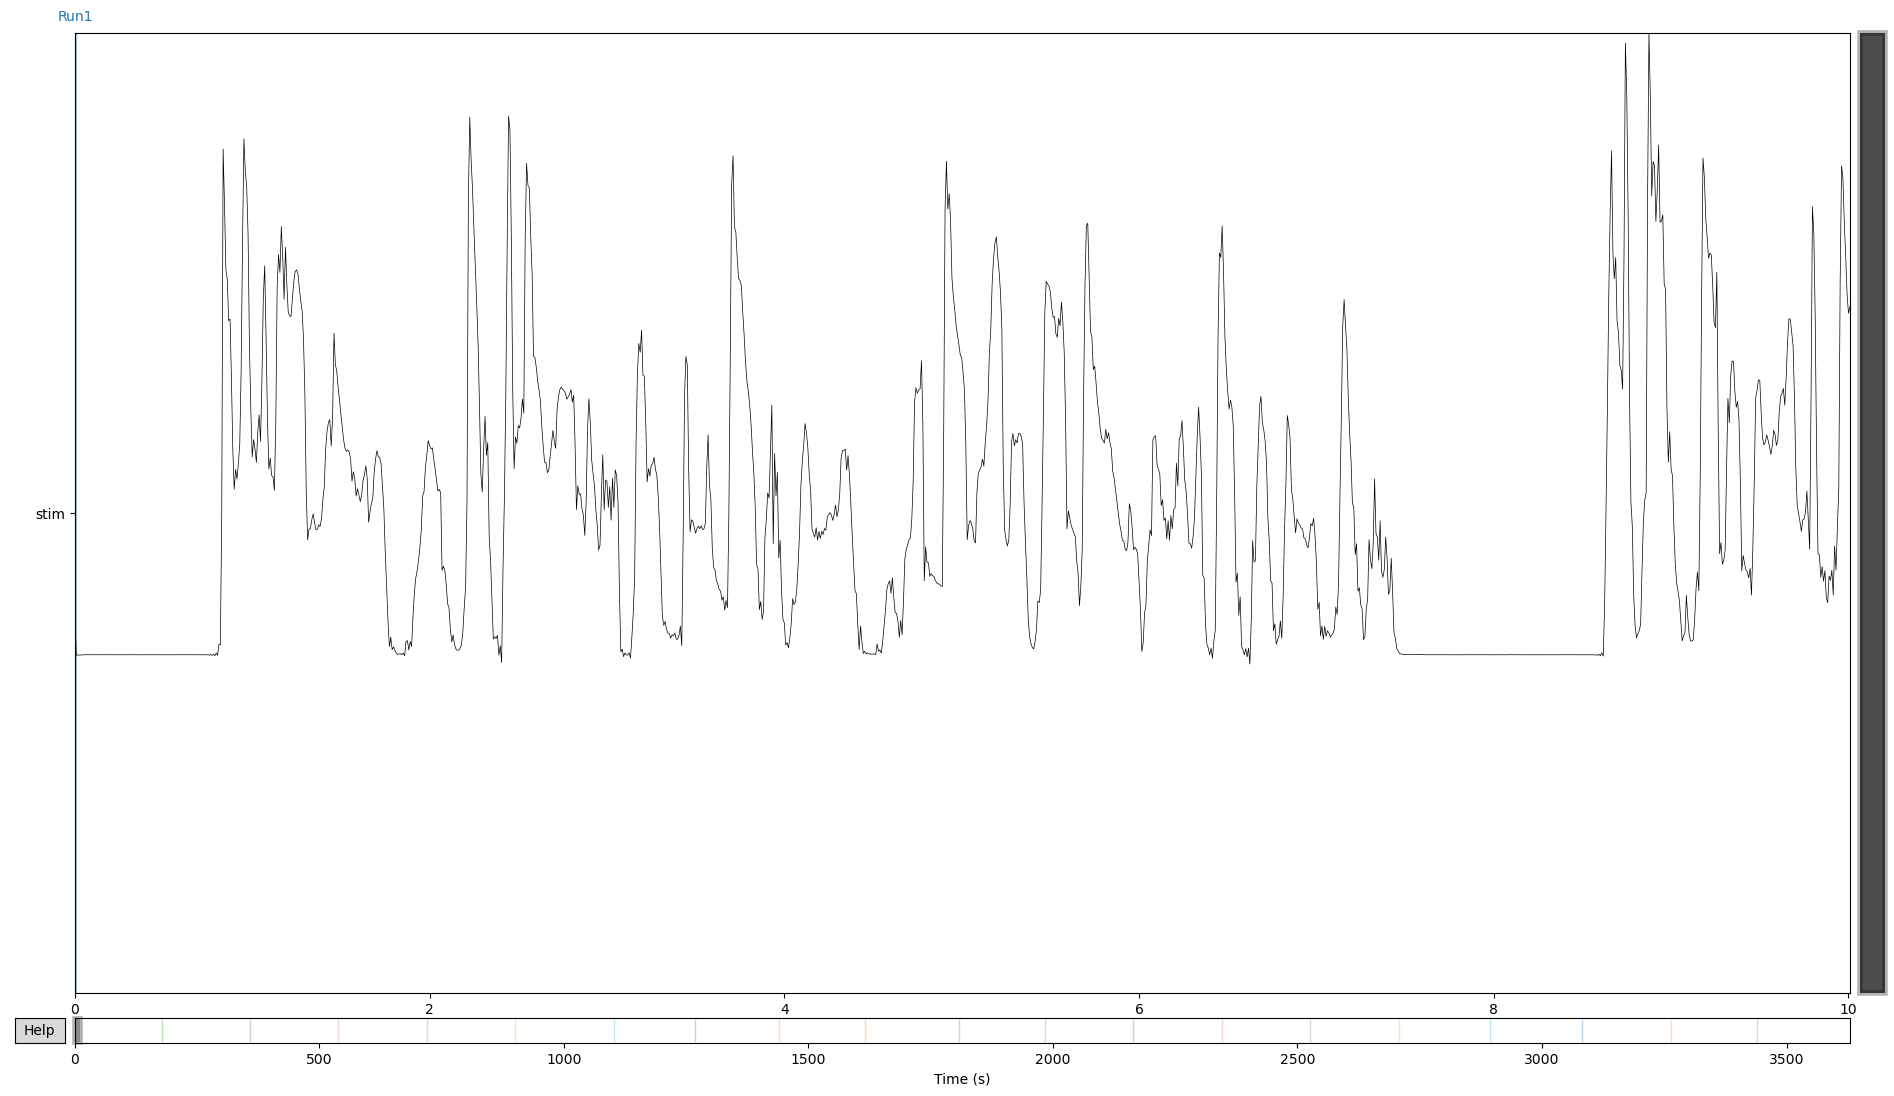

In [8]:
%matplotlib inline
with mne.viz.use_browser_backend('matplotlib'):
    fig2 = raw.copy().pick_channels(['stim']).plot(duration=10.0, start=0.0, scalings=dict(stim=1))
    fig2.set_size_inches(10, 1);



### Filtering the data


In [9]:
# Remove line Noise only from EEG
freqs_notch = (50)
raw_notch = raw.copy().notch_filter(freqs=freqs_notch, picks=['eeg', 'bio'])
raw_notch_filt = raw_notch.copy().filter(1, 32, picks=['eeg', 'bio'])

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.7s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 423 samples (3.305 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.9s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


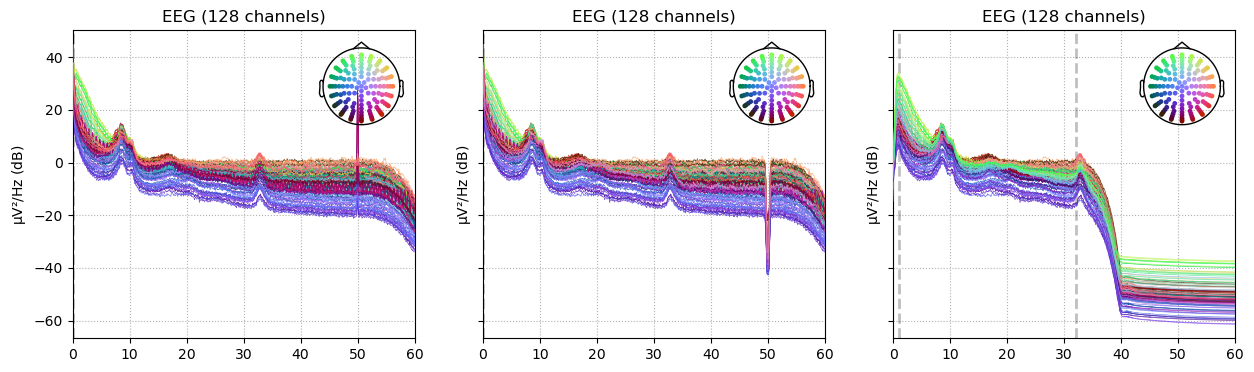

In [10]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True, sharex=True)
with mne.viz.use_browser_backend('matplotlib'):
    raw.plot_psd(fmax=60, ax=ax[0]);
    raw_notch.plot_psd(fmax=60, ax=ax[1]);
    raw_notch_filt.plot_psd(fmax=60, ax=ax[2]);
    plt.savefig(os.path.join(subj_dir, 'psd_filtering.png'))

In [11]:
# Check if filtering is applied to all channels.
raw_notch_filt.info

<Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 128 EEG, 2 BIO, 1 Stimulus
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 highpass: 1.0 Hz
 lowpass: 32.0 Hz
 meas_date: unspecified
 nchan: 131
 projs: []
 sfreq: 128.0 Hz
>

#### Setting the reference channel

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


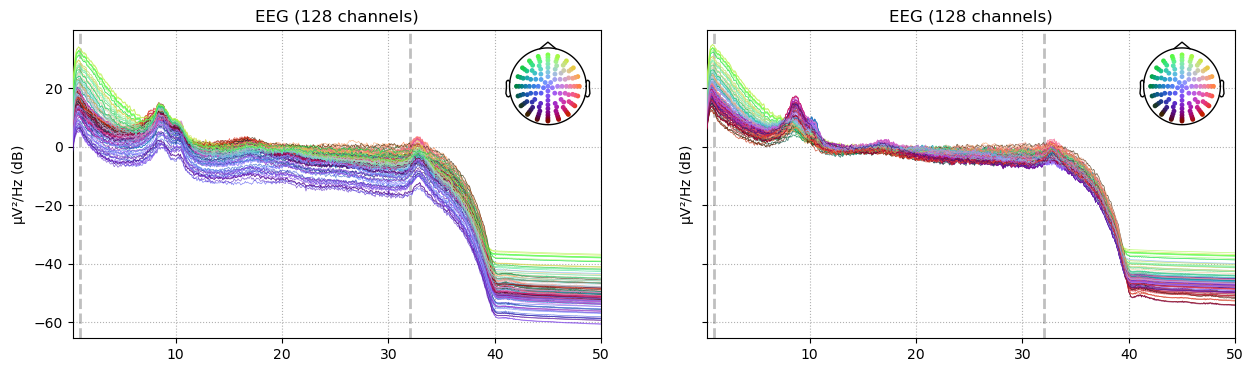

In [12]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)
if True:
    raw_notch_filt.plot_psd(fmin=0.3, fmax=50, ax=ax[0]);
    raw_notch_filt.set_eeg_reference(['M1', 'M2']);
    raw_notch_filt.plot_psd(fmin=0.3, fmax=50, ax=ax[1]);
    plt.savefig(os.path.join(subj_dir, 'psd_ref.png'))


### Time segment rejection
Drawing annotations
You can enter annotation mode by pressing a key. In annotation mode you can mark segments of data (and modify existing annotations) with the left mouse button. You can use the description of any existing annotation or create a new description by typing when the annotation dialog is active. Notice that the description starting with the keyword 'bad' means that the segment will be discarded when epoching the data. Existing annotations can be deleted with the right mouse button. Annotation mode is exited by pressing a again or closing the annotation window. See also mne.Annotations and Marking bad raw segments with annotations. To see all the interactive features, hit ? key or click help in the lower left corner of the browser window.

In [13]:
%matplotlib qt
raw_ts_dropped  = raw_notch_filt.copy();
raw_ts_dropped.plot(duration=40, n_channels=64);
print('------------------------')
print(raw_ts_dropped.info['bads'])

------------------------
[]


1   HIToolbox                           0x00007ff81bcfb726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff81bcfb2b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff81bc6acd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff81bcfb173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff8157c8287 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81561d055 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   CoreFoundation                      0x00007ff8123323d4 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
8   CoreFoundation                      0x00007ff8123cc41a ___CFXRegistrationPost_block_invoke + 88
9   CoreFoundation                      0x00007ff8123cc369 _CFXR

Channels marked as bad:
none


Traceback (most recent call last):
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 307, in process
    func(*args, **kwargs)
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/_mpl_figure.py", line 190, in _close
    super()._close(event)
  File "/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/_mpl_figure.py", line 114, in _close
    self.mne.parent_fig.mne.child_figs.remove(self)
ValueError: list.remove(x): x not in list
1   HIToolbox                           0x00007ff81bc880c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff81bcc4638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff816f6923d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff81727c05a _ZN21CGSDatagramReadStream26disp

Setting 16963 of 464572 (3.65%) samples to NaN, retaining 447609 (96.35%) samples.
Effective window size : 2.000 (s)


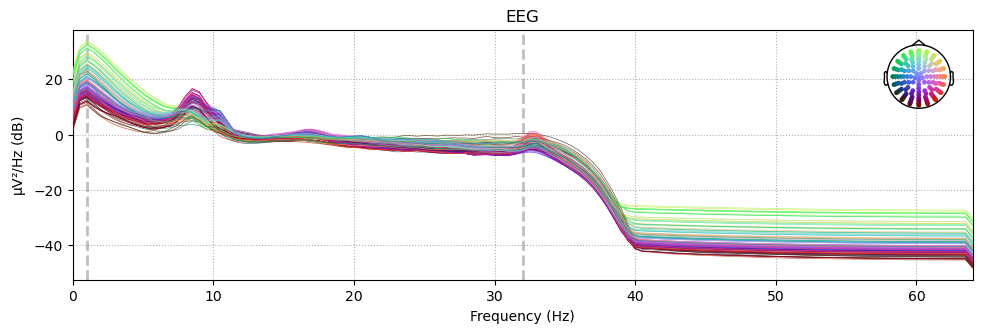

In [14]:
raw_ts_dropped.compute_psd().plot()

### Channel Rejection

In [15]:
%matplotlib qt
#raw_notch_filt.plot_psd()
raw_ts_dropped.plot(duration=40, n_channels=64);
print('------------------------')
print(raw_ts_dropped.info['bads'])

------------------------
[]


Channels marked as bad:
none


In [16]:
# Interpolate bad channels

raw_ts_dropped.annotations.save(os.path.join(subj_dir, 'file-annotations.fif'))
raw_interp = raw_ts_dropped.copy().interpolate_bads(method=dict(eeg='spline'), verbose=True, reset_bads=False)

/var/folders/cn/42yytr0j3dl9t4k24ldqk59h0000gq/T/ipykernel_26449/2574101944.py:3: RuntimeWarning: This filename (../../outputs/rochester_data/natural_speech/subj_19/file-annotations.fif) does not conform to MNE naming conventions. All annotations files should end with -annot.fif, -annot.fif.gz, _annot.fif, _annot.fif.gz, .txt or .csv
  raw_ts_dropped.annotations.save(os.path.join(subj_dir, 'file-annotations.fif'))
/var/folders/cn/42yytr0j3dl9t4k24ldqk59h0000gq/T/ipykernel_26449/2574101944.py:4: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_interp = raw_ts_dropped.copy().interpolate_bads(method=dict(eeg='spline'), verbose=True, reset_bads=False)


In [17]:
[i for i in raw_ts_dropped.annotations]

[OrderedDict([('onset', 0.0),
              ('duration', 0.0),
              ('description', 'Run1'),
              ('orig_time', None)]),
 OrderedDict([('onset', 25.70592410714286),
              ('duration', 2.331883928571429),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 176.5194642857143),
              ('duration', 2.4919151785714178),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 177.570312),
              ('duration', 0.0),
              ('description', 'Run2'),
              ('orig_time', None)]),
 OrderedDict([('onset', 264.4713973214286),
              ('duration', 1.8517901785714344),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 293.684625),
              ('duration', 0.9373258928571886),
              ('description', 'BAD_'),
              ('orig_time', None)]),
 OrderedDict([('onset', 357.26051339285715),
      

In [18]:
# Set bad labels

raw_interp.annotations.description = ['bad'] * len(raw_interp.annotations)
raw_interp.plot(duration=40, n_channels=128);

Channels marked as bad:
none


### ICA analysis

#### Rereference to common average

In [19]:
raw_ref = raw_interp.copy().set_eeg_reference('average', projection=False)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 16963 of 464572 (3.65%) samples to NaN, retaining 447609 (96.35%) samples.


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 16963 of 464572 (3.65%) samples to NaN, retaining 447609 (96.35%) samples.
Effective window size : 16.000 (s)


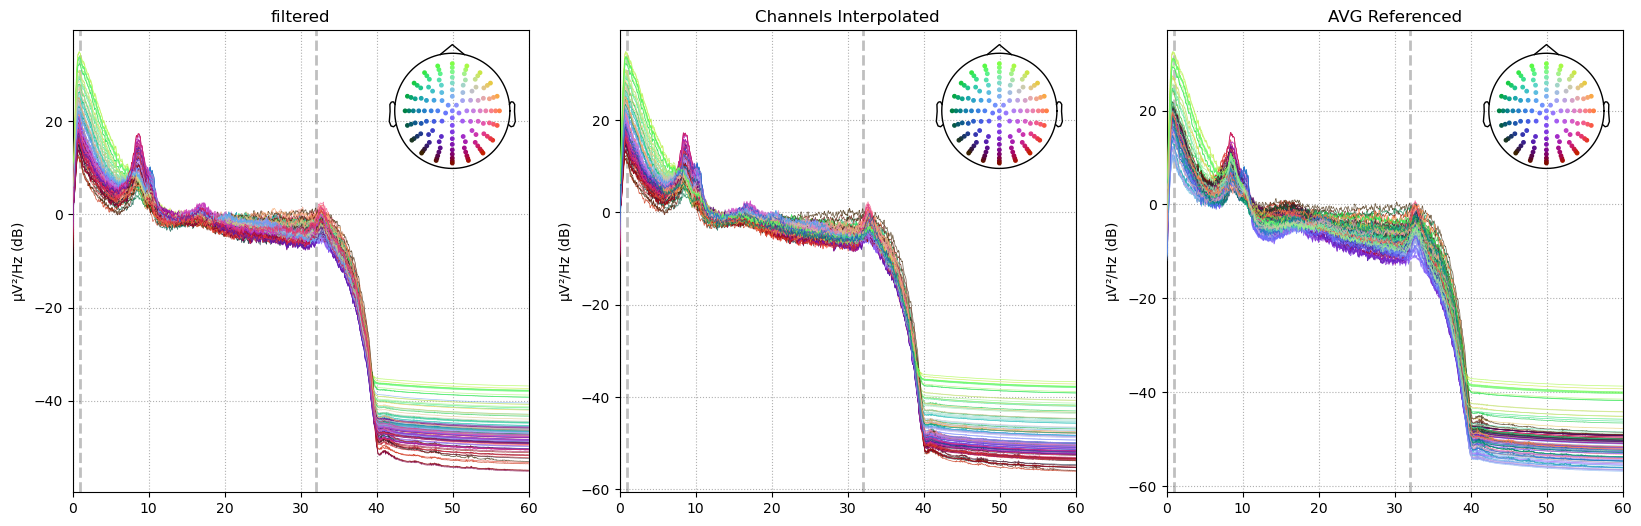

In [20]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

with mne.viz.use_browser_backend('matplotlib'):
    raw_notch_filt.plot_psd(fmax=60, ax=ax[0]);
    ax[0].set_title('filtered');
    raw_interp.plot_psd(fmax=60, ax=ax[1]);
    ax[1].set_title('Channels Interpolated');
    raw_ref.plot_psd(fmax=60, ax=ax[2]);
    ax[2].set_title('AVG Referenced');
plt.savefig(os.path.join(subj_dir, 'psd_avgref.png'))

### ICA Analysis

In [21]:
n_good_eeg_chan = raw_ref.copy().pick_types(eeg=True, exclude='bads').info['nchan']
n_good_eeg_chan

128

In [22]:
ica = mne.preprocessing.ICA(n_components=40, method='infomax', fit_params=dict(extended=True),
              random_state=0)
#ica = ICA(n_components=30, method='fastica', random_state=97)
ica.fit(raw_ref)

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Omitting 16963 of 464572 (3.65%) samples, retaining 447609 (96.35%) samples.
Selecting by number: 40 components
Computing Extended Infomax ICA
Fitting ICA took 103.9s.


Method,infomax
Fit,500 iterations on raw data (447609 samples)
ICA components,40
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,—


['_update_mixing_matrix', 'mixing_matrix_', 'unmixing_matrix_']
 Mixing: (40, 40)   Unmixing: (40, 40)


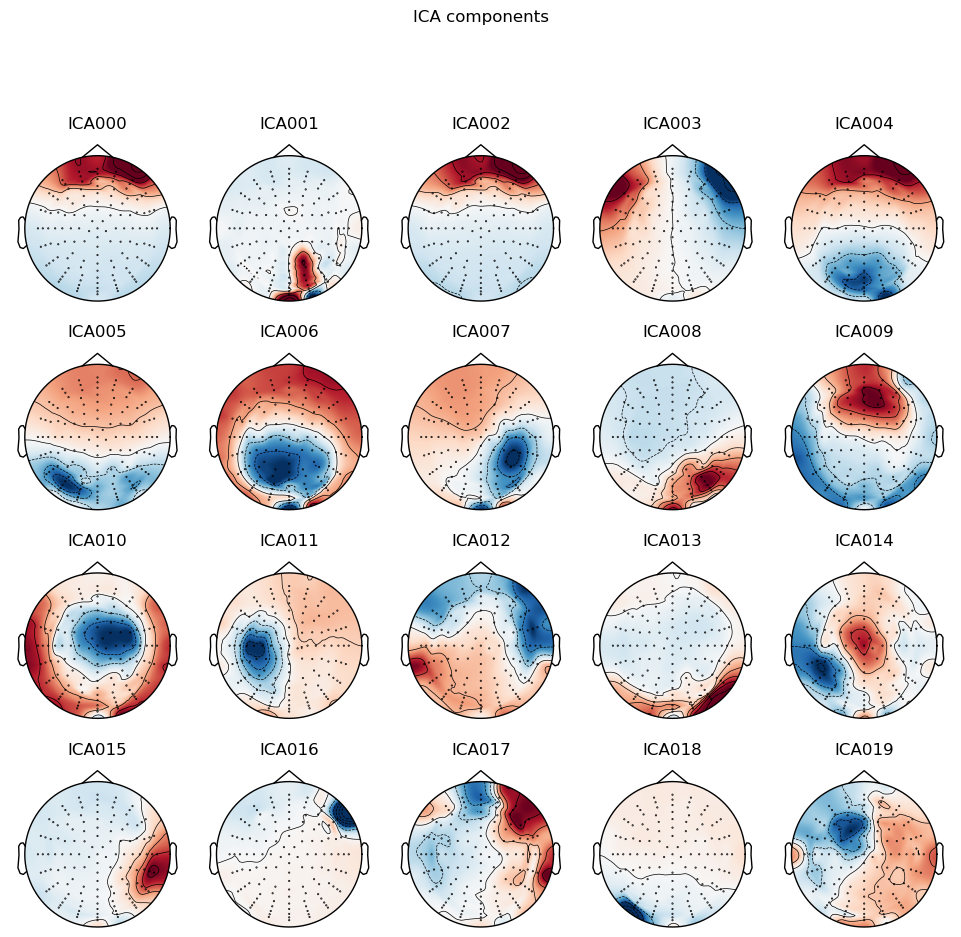

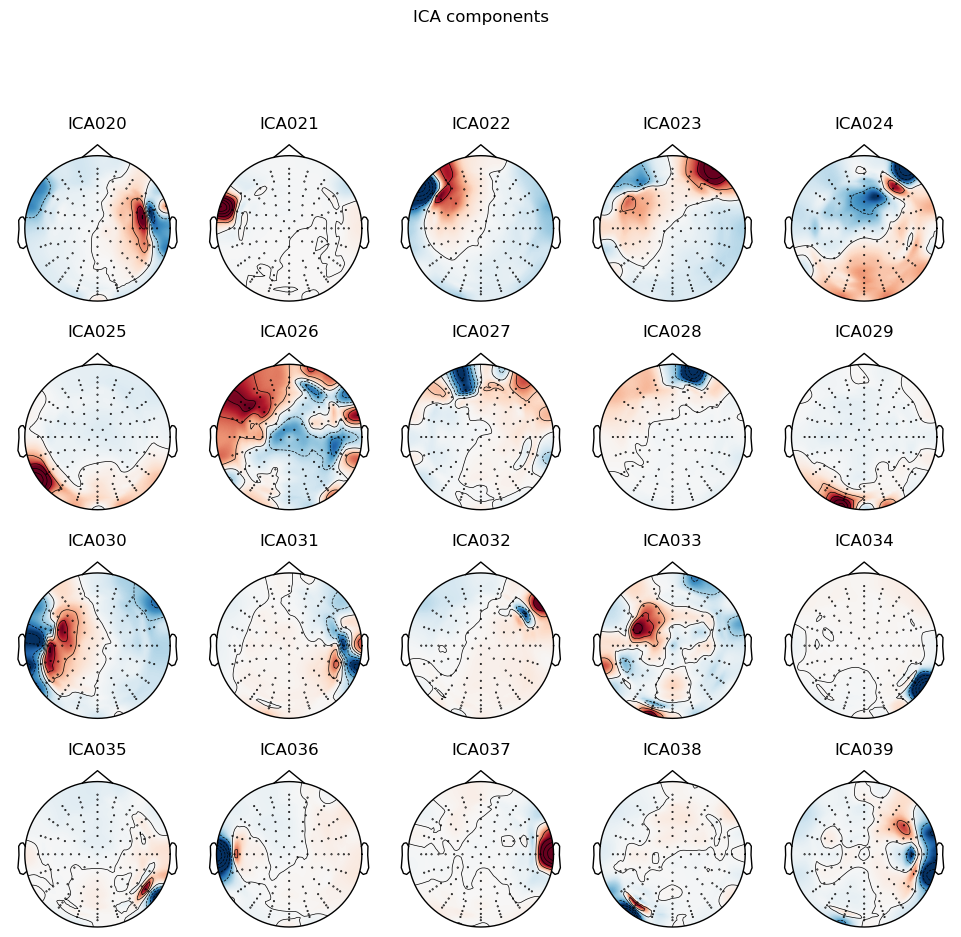

In [23]:
print([i for i in dir(ica) if 'mix' in i])
print(f" Mixing: {ica.mixing_matrix_.shape}   Unmixing: {ica.unmixing_matrix_.shape}")
%matplotlib inline
ica.plot_components();
plt.show()

In [24]:
%matplotlib qt
ica.plot_sources(raw_ref);

Creating RawArray with float64 data, n_channels=40, n_times=464572
    Range : 0 ... 464571 =      0.000 ...  3629.461 secs
Ready.


1   HIToolbox                           0x00007ff81bcfb726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff81bcfb2b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff81bc6acd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff81bcfb173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff8157c8287 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff81561d055 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   CoreFoundation                      0x00007ff8123323d4 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
8   CoreFoundation                      0x00007ff8123cc41a ___CFXRegistrationPost_block_invoke + 88
9   CoreFoundation                      0x00007ff8123cc369 _CFXR

In [25]:
ica.plot_properties(raw_ref, picks=[0, 1, 2, 3, 21, 18, 36]);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1703 matching events found
No baseline correction applied
0 projection items activated


In [26]:
ica.exclude = [0, 1, 2, 3, 21, 18, 36]
raw_ica = raw_ref.copy()
ica.apply(raw_ica, n_pca_components=n_good_eeg_chan-1)
ica.save(os.path.join(subj_dir, 'file-ica.fif'), overwrite=True)


Applying ICA to Raw instance
    Transforming to ICA space (40 components)
    Zeroing out 7 ICA components
    Projecting back using 127 PCA components
Writing ICA solution to /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/subj_19/file-ica.fif...


Method,infomax
Fit,500 iterations on raw data (447609 samples)
ICA components,40
Available PCA components,128
Channel types,eeg
ICA components marked for exclusion,ICA000ICA001ICA002ICA003ICA021ICA018ICA036


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 16963 of 464572 (3.65%) samples to NaN, retaining 447609 (96.35%) samples.
Effective window size : 16.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 16963 of 464572 (3.65%) samples to NaN, retaining 447609 (96.35%) samples.


/Users/keyvan.mahjoory/opt/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Effective window size : 16.000 (s)


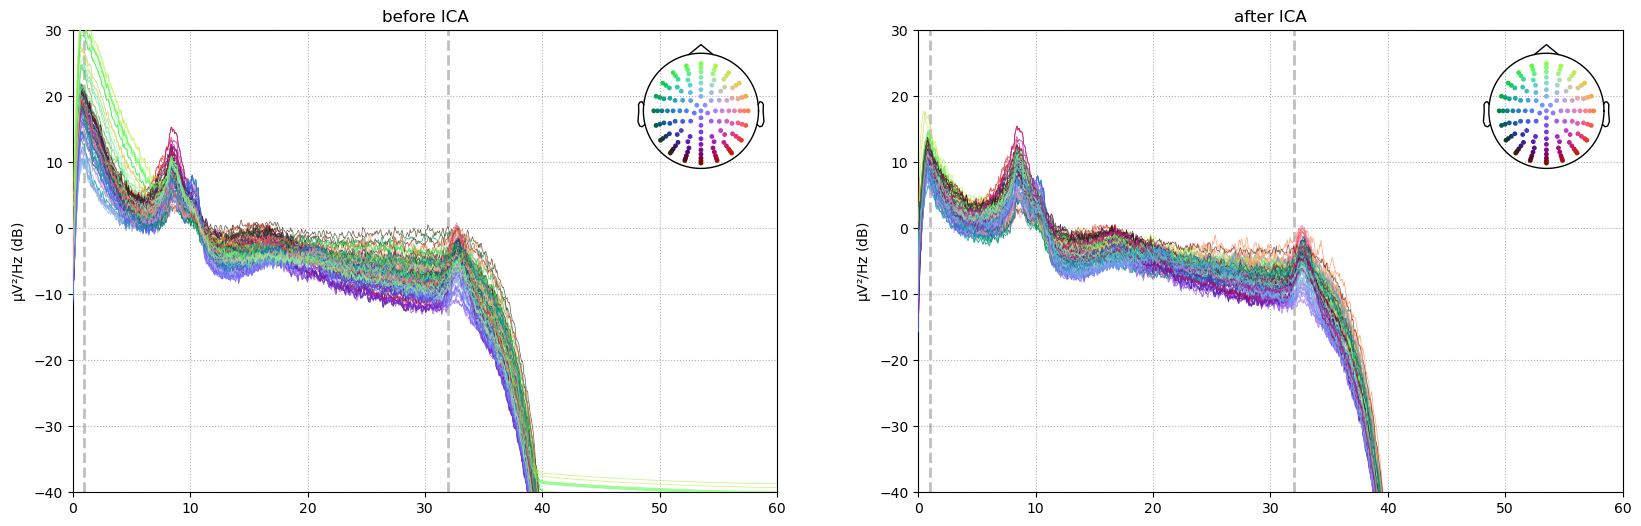

In [27]:
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

with mne.viz.use_browser_backend('matplotlib'):
    raw_ref.plot_psd(fmax=60, ax=ax[0]);
    ax[0].set_title('before ICA')
    ax[0].set_ylim(-40, 30)
    raw_ica.plot_psd(fmax=60, ax=ax[1]);
    ax[1].set_title('after ICA')
    ax[1].set_ylim(-40, 30)
plt.savefig(os.path.join(subj_dir, 'psd_before_after_ica.png'))

### Save preprocessed data

In [28]:


raw_ref.save(fname=f"{subj_dir}/subj_{subj_id}_before_ica_raw.fif")
raw_ica.save(fname=f"{subj_dir}/subj_{subj_id}_after_ica_raw.fif")
raw_ica.save(os.path.join(write_path, 'after_ica_raw', f"subj_{subj_id}_after_ica_raw.fif"))



Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/subj_19/subj_19_before_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/subj_19/subj_19_before_ica_raw.fif
[done]
Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/subj_19/subj_19_after_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/subj_19/subj_19_after_ica_raw.fif
[done]
Writing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/after_ica_raw/subj_19_after_ica_raw.fif
Closing /Users/keyvan.mahjoory/k1_analyses/prj_neuroread/analysis/codes/EEG/../../outputs/rochester_data/natural_speech/after_ica_raw/subj_19_after_ica_raw.fif
[done]


In [29]:
print(subj_dir)
os.listdir(subj_dir)


../../outputs/rochester_data/natural_speech/subj_19


['psd_agref.png',
 'subj_19_after_ica_raw.fif',
 'file-annotations.fif',
 'psd_ref.png',
 'file-ica.fif',
 'psd_before_after_ica.png',
 'subj_19_before_ica_raw.fif',
 'psd_filtering.png']